In [193]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

# Load the Data

In [194]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

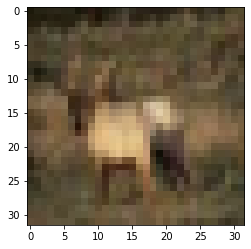

In [8]:
plt.imshow(X_train[3])

In [9]:
#label of above image
y_train[3]

array([4], dtype=uint8)

# Preprocessing : 
### One hot encode

In [196]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

### Normalize the pixels

In [197]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

## CNN

In [60]:
K.clear_session()
model=Sequential()

model.add(Conv2D(32, (5,5),  input_shape=(32,32,3), padding='same', activation='relu'))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),  activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(128, (2,2), activation='relu'))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)        

In [61]:
model.compile(Adam(lr=0.0001),
              loss='categorical_crossentropy',        
              metrics=['accuracy'])

## Training


In [63]:
epochs = 20
history = model.fit(X_train,
          y_train_one_hot,
          batch_size=128,
          epochs=epochs, 
          validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 171s 5ms/step - loss: 1.2200 - accuracy: 0.5677 - val_loss: 1.2754 - val_accuracy: 0.5456
Epoch 2/20
35000/35000 [==============================] - 171s 5ms/step - loss: 1.1839 - accuracy: 0.5817 - val_loss: 1.2406 - val_accuracy: 0.5606
Epoch 3/20
35000/35000 [==============================] - 170s 5ms/step - loss: 1.1711 - accuracy: 0.5863 - val_loss: 1.2244 - val_accuracy: 0.5667
Epoch 4/20
35000/35000 [==============================] - 169s 5ms/step - loss: 1.1546 - accuracy: 0.5929 - val_loss: 1.2418 - val_accuracy: 0.5629
Epoch 5/20
35000/35000 [==============================] - 169s 5ms/step - loss: 1.1398 - accuracy: 0.5991 - val_loss: 1.2059 - val_accuracy: 0.5755
Epoch 6/20
35000/35000 [==============================] - 169s 5ms/step - loss: 1.1210 - accuracy: 0.6048 - val_loss: 1.2429 - val_accuracy: 0.5659
Epoch 7/20
35000/35000 [==============================] - 169s

## Evaluate

In [64]:
model.evaluate(X_test,y_test_one_hot)

10000/10000 [==============================] - 18s 2ms/step


[1.11565825176239, 0.6079999804496765]

## Visualize Accuracy and Loss 

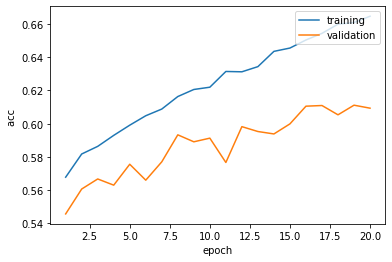

In [79]:
#Accuracy

epoch_nums = range(1, epochs+1)
training_acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]
plt.plot(epoch_nums , training_acc)
plt.plot(epoch_nums , validation_acc)
plt.xlabel('epoch')
plt.ylabel('acc ')
plt.legend(['training','validation'], loc='upper right')
plt.show()

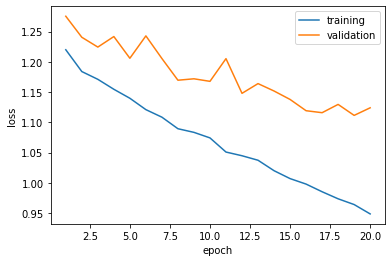

In [76]:
epoch_nums = range(1, epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

## Prediction on images

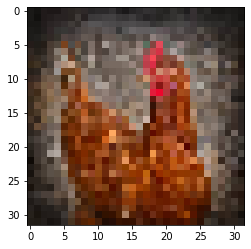

In [190]:
img_pred = image.load_img('chi1.jfif', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [191]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [192]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])




Most likely class : truck , Probability :  1.0
Most second  likely class : ship , Probability :  0.0
Most third  likely class : horse , Probability :  0.0
